In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../pyfiles')
from exampleCreator import createExample, createUnwrappedBaseline, TrueBranchCuts
from unwrap import unwrap
from setup import find_residues
from branchCut import branch_cut

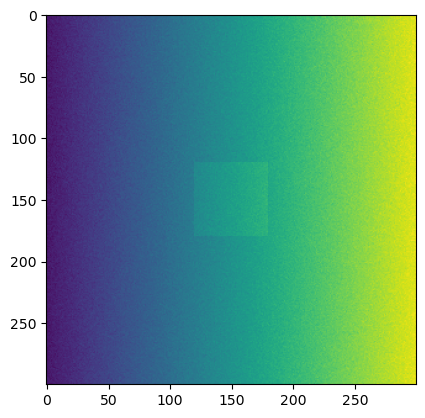

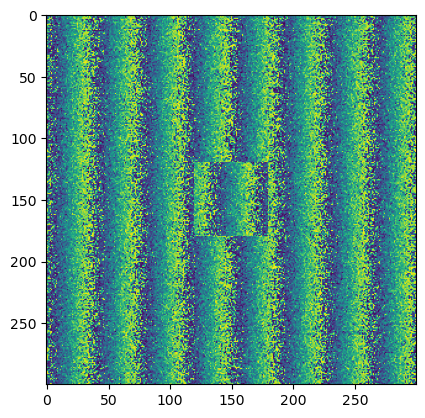

In [12]:
# make example
SIZE = (300,300)
MINPHASE = 0
MAXPHASE = 16*np.pi
phase_baseline = createUnwrappedBaseline(SIZE, (MINPHASE,MAXPHASE), format='horizontal')

square1 = np.zeros(SIZE)
square1[120:180,120:180] = 0.9*np.pi

square2 = np.ones(SIZE)
square2[120:180,120:180] = 1

phase_unwrapped, phase_wrapped = createExample(phase_baseline, add_image=square1, mult_image=square2, noise_sigma=0.3*np.pi, add_first=False)
plt.figure()
plt.imshow(phase_unwrapped)

plt.figure()
plt.imshow(phase_wrapped)

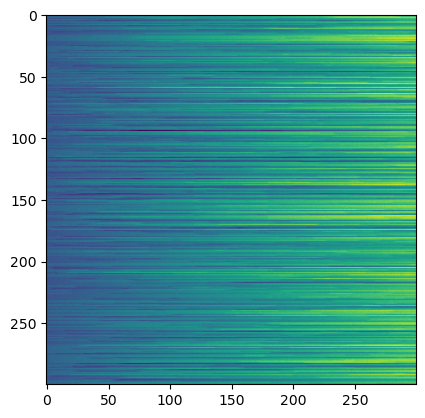

In [13]:
plt.imshow(np.unwrap(phase_wrapped))

In [14]:
residues = find_residues(phase_wrapped)
BranchCuts = branch_cut(residues)
phase_unwrapped_BC = unwrap(phase_wrapped,seed=(0,0), branchCuts=BranchCuts, mode='bfs', unwrapBranchPixels=True)
phase_unwrapped_BC_2 = unwrap(phase_wrapped,seed=(0,0), branchCuts=BranchCuts, mode='dfs',unwrapBranchPixels=True)
TBC = TrueBranchCuts(phase_unwrapped)
true_unwrap = unwrap(phase_wrapped, seed=(0,0), branchCuts=TBC)

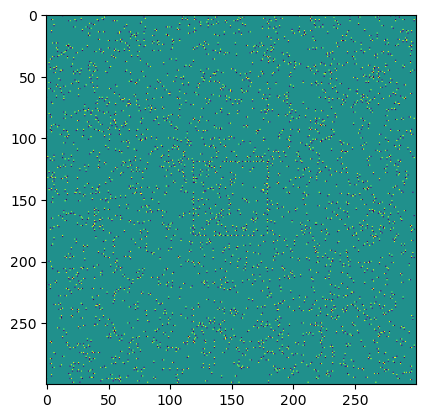

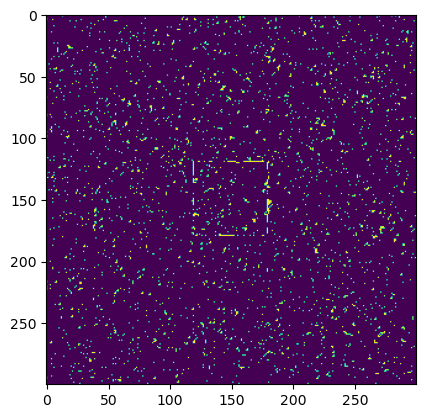

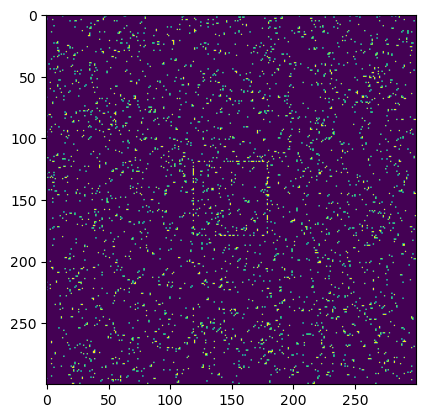

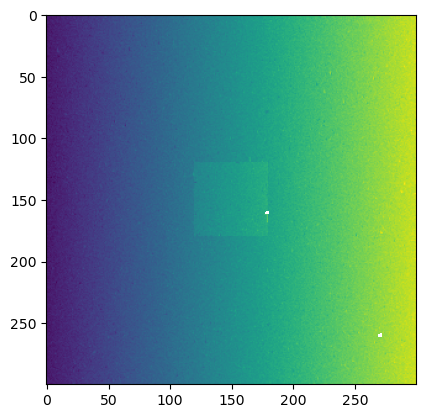

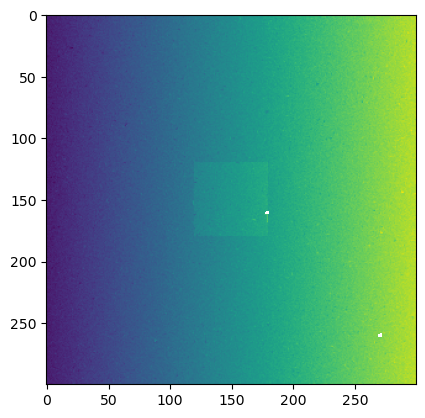

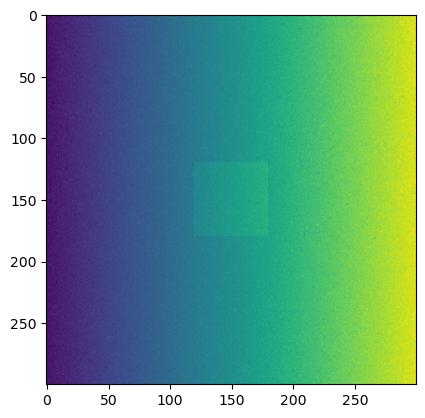

In [15]:

plt.figure()
plt.imshow(residues)

plt.figure()
plt.imshow(BranchCuts)

plt.figure()
plt.imshow(TBC)

plt.figure()
plt.imshow(phase_unwrapped_BC)

plt.figure()
plt.imshow(phase_unwrapped_BC_2)

plt.figure()
plt.imshow(true_unwrap)